In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\sea_ice\seaice.csv')

In [67]:
df.head(n=5)

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


In [68]:
# Convert values to objects 
df['Year'] = df['Year'].apply(lambda x: str(x))
df['Month'] = df['Month'].apply(lambda x: str(x))
df['Day'] = df['Day'].apply(lambda x: str(x))
# Add values together and convert to datetime format
df['Date'] = df['Year'] + '-' + df['Month'] + '-' + df['Day']

In [69]:
# Collect only needed columns to make data easier to work with
df = df[['Date','Extent','Missing','hemisphere']]

In [70]:
# Divide data into seperate variables for north and south poles
north = df[df['hemisphere']== 'north']
south = df[df['hemisphere']== 'south']

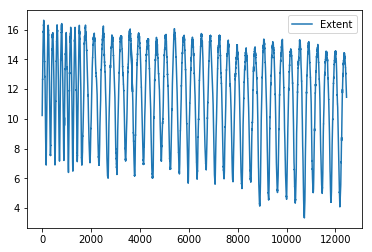

In [71]:
# Plot unformatted data first
data = north[['Date','Extent']]
data.plot()

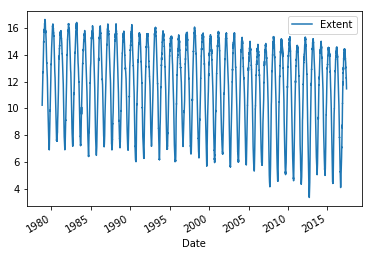

In [72]:
# Plot data with more clear x axis labels
data.index = pd.to_datetime(data.Date)
data.plot()
plt.show()

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


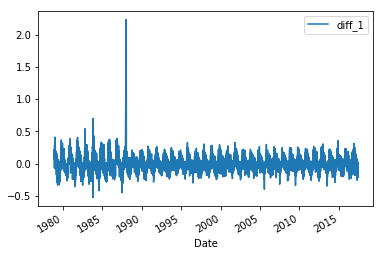

In [73]:
# Plot shifted data
data['diff_1'] = data.Extent - data.Extent.shift()
data.plot(y='diff_1')
plt.show()

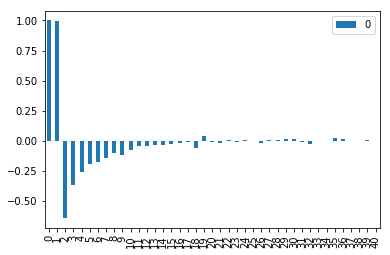

In [74]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(data.Extent))
x_acf.plot(kind='bar')

In [75]:
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(data.Extent, order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.Extent   No. Observations:                12453
Model:                 ARIMA(0, 1, 0)   Log Likelihood               11809.635
Method:                           css   S.D. of innovations              0.094
Date:                Mon, 01 Apr 2019   AIC                         -23615.270
Time:                        18:45:55   BIC                         -23600.410
Sample:                             1   HQIC                        -23610.294
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.829e-05      0.001      0.117      0.907      -0.002       0.002
Residuals Description
count    1.245300e+04
mean     9.001377e-10
std      9.373957e-02
min     -5.270983e-01
25%     -6.009829e-02

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [76]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Extent, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Extent   No. Observations:                12454
Model:                     ARMA(1, 0)   Log Likelihood               11808.838
Method:                       css-mle   S.D. of innovations              0.094
Date:                Mon, 01 Apr 2019   AIC                         -23611.677
Time:                        18:45:56   BIC                         -23589.387
Sample:                             0   HQIC                        -23604.213
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.2759      1.511      7.463      0.000       8.315      14.237
ar.L1.Extent     0.9995      0.000   4131.135      0.000       0.999       1.000
                                    Roots   

In [77]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Extent, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Extent   No. Observations:                12454
Model:                     ARMA(0, 1)   Log Likelihood              -23863.535
Method:                       css-mle   S.D. of innovations              1.644
Date:                Mon, 01 Apr 2019   AIC                          47733.069
Time:                        18:45:57   BIC                          47755.359
Sample:                             0   HQIC                         47740.533
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.4209      0.029    390.192      0.000      11.363      11.478
ma.L1.Extent     0.9871      0.001    931.189      0.000       0.985       0.989
                                    Roots   

In [78]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Extent, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Extent   No. Observations:                12454
Model:                     ARMA(1, 1)   Log Likelihood               13025.992
Method:                       css-mle   S.D. of innovations              0.085
Date:                Mon, 01 Apr 2019   AIC                         -26043.984
Time:                        18:46:03   BIC                         -26014.265
Sample:                             0   HQIC                        -26034.033
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3064      1.334      8.479      0.000       8.693      13.920
ar.L1.Extent     0.9993      0.000   3292.423      0.000       0.999       1.000
ma.L1.Extent     0.3582      0.007     52.44

In [79]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(data.Extent, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Extent   No. Observations:                12453
Model:                 ARIMA(1, 1, 1)   Log Likelihood               15643.669
Method:                       css-mle   S.D. of innovations              0.069
Date:                Mon, 01 Apr 2019   AIC                         -31279.338
Time:                        18:46:11   BIC                         -31249.619
Sample:                             1   HQIC                        -31269.387
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.008      0.072      0.943      -0.014       0.016
ar.L1.D.Extent     0.9871      0.002    608.796      0.000       0.984       0.990
ma.L1.D.Extent    -0.8387      0.005

Text(0.5, 1.0, 'Histogram of Residuals')

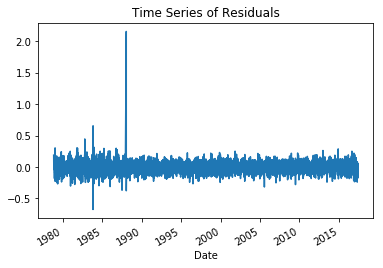

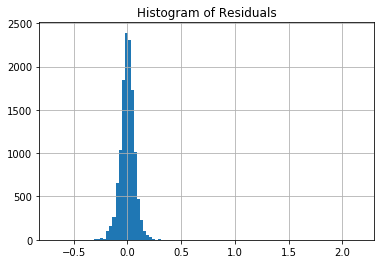

In [80]:
residuals = pd.DataFrame(model_111_fit.resid)
residuals.plot(legend=False)
plt.title("Time Series of Residuals")
residuals.hist(bins=100)
plt.title("Histogram of Residuals")

Text(0.5, 1.0, 'Histogram of Residuals')

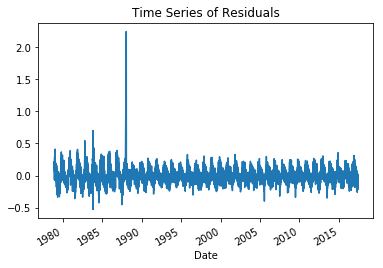

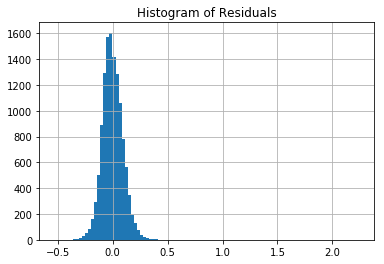

In [81]:
residuals = pd.DataFrame(model_010_fit.resid)
residuals.plot(legend=False)
plt.title("Time Series of Residuals")
residuals.hist(bins=100)
plt.title("Histogram of Residuals")

In [82]:
# Subset data into 1987-1989 to see strange peak
df_87 = data[data['Date'] > '1987-1-1']
df_87_89 = df_87[data['Date'] < '1989-1-1']

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


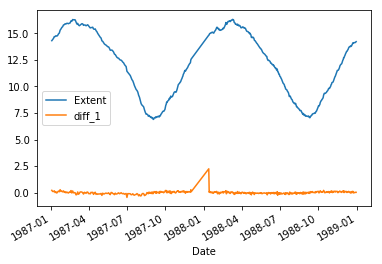

In [83]:
# Plot subsetted data
df_87_89.plot()
plt.show()

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


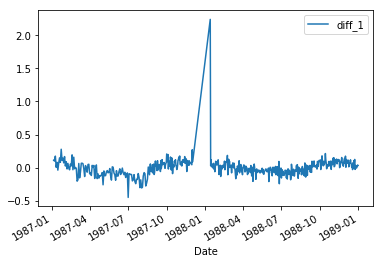

In [84]:
# Plot shifted data
df_87_89['diff_1'] = df_87_89.Extent - df_87_89.Extent.shift()
df_87_89.plot(y='diff_1')
plt.show()

In [85]:
# Produces same peak for south data but inverted?
# Link below shows physical reasoning - hottest year on record in 1988 caused dip in sea ice

In [94]:
data = south[['Date','Extent']]
data.index = pd.to_datetime(data.Date)
# Subset data into 1987-1989 to see strange peak
df_87 = data[data['Date'] > '1987-1-1']
df_87_89 = df_87[data['Date'] < '1989-1-1']

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


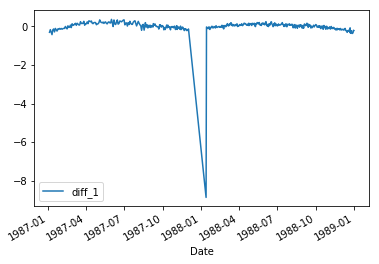

In [95]:
# Plot shifted data
df_87_89['diff_1'] = df_87_89.Extent - df_87_89.Extent.shift()
df_87_89.plot(y='diff_1')
plt.show()

 # Peak produced due to fact that 1988 was hottest year on record most likely
    https://www.latimes.com/archives/la-xpm-1989-02-04-mn-1524-story.html

In [ ]:
north.index = pd.to_datetime(north.Date)
south.index = pd.to_datetime(south.Date)

trend_n = north[['Date','Extent']]
trend_s = south[['Date','Extent']]

In [ ]:
# Make linear regression plots for north and south data to show overall trend

# Will this even run on my computer?????
import seaborn as sns
sns.lmplot(x='Date',y='Extent',data=trend_n)

In [ ]:
sns.lmplot(x='Date',y='Extent',data=trend_s)